In [1]:
#!pip install pyspark

# Basic EDA and data cleaning of the file course_info.csv

In [2]:
from datetime import datetime, date
import pandas as pd
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
import matplotlib.pyplot as plt

In [3]:
spark = SparkSession.builder.getOrCreate()
sc=spark.sparkContext
print(sc)

<SparkContext master=local[*] appName=pyspark-shell>


In [4]:
# Define schema for Udemy Course Info
course_info = StructType([
StructField("id", StringType(), True),
StructField("title", StringType(), True), 
StructField("is_paid", StringType(), True),
StructField("price", StringType(), True),
StructField("headline", StringType(), True),
StructField("num_subscribers", StringType(), True),
StructField("avg_rating", StringType(), True),
StructField("num_reviews", StringType(), True),
StructField("num_comments", StringType(), True),
StructField("num_lectures", StringType(), True),
StructField("content_length_min", StringType(), True),
StructField("published_time", StringType(), True),
StructField("last_update_date", StringType(), True),
StructField("category", StringType(), True),
StructField("subcategory", StringType(), True), 
StructField("topic", StringType(), True),
StructField("language", StringType(), True), 
StructField("course_url", StringType(), True), 
StructField("instructor_name", StringType(), True),
StructField("instructor_url", StringType(), True)])
print(course_info)

StructType([StructField('id', StringType(), True), StructField('title', StringType(), True), StructField('is_paid', StringType(), True), StructField('price', StringType(), True), StructField('headline', StringType(), True), StructField('num_subscribers', StringType(), True), StructField('avg_rating', StringType(), True), StructField('num_reviews', StringType(), True), StructField('num_comments', StringType(), True), StructField('num_lectures', StringType(), True), StructField('content_length_min', StringType(), True), StructField('published_time', StringType(), True), StructField('last_update_date', StringType(), True), StructField('category', StringType(), True), StructField('subcategory', StringType(), True), StructField('topic', StringType(), True), StructField('language', StringType(), True), StructField('course_url', StringType(), True), StructField('instructor_name', StringType(), True), StructField('instructor_url', StringType(), True)])


In [5]:
course_info_df=spark.read.option("header","true").csv("Course_info.csv",schema=course_info)
course_info_df.head(3)

[Row(id='4715.0', title='Online Vegan Vegetarian Cooking School', is_paid='True', price='24.99', headline="Learn to cook delicious vegan recipes. Filmed over 15 years ago, watch the first 2hrs FREE to see if it's right for you.", num_subscribers='2231.0', avg_rating='3.75', num_reviews='134.0', num_comments='42.0', num_lectures='37.0', content_length_min='1268.0', published_time='2010-08-05T22:06:13Z', last_update_date='2020-11-06', category='Lifestyle', subcategory='Food & Beverage', topic='Vegan Cooking', language='English', course_url='/course/vegan-vegetarian-cooking-school/', instructor_name='Angela Poch', instructor_url='/user/angelapoch/'),
 Row(id='1769.0', title='The Lean Startup Talk at Stanford E-Corner', is_paid='False', price='0.0', headline='"Debunking Myths of Entrepreneurship A startup is not a ""doll house"" version of a larger enterprise."', num_subscribers='26474.0', avg_rating='4.5', num_reviews='709.0', num_comments='112.0', num_lectures='9.0', content_length_min='

In [6]:
# Define schema for Udemy Course Comments 
comments = StructType([
StructField("id", StringType(), True),
StructField("course_id", StringType(), True),
StructField("rate", StringType(), True),
StructField("date", StringType(), True),
StructField("display_name", StringType(), True),
StructField("comment", StringType(), True)])
print(comments)

StructType([StructField('id', StringType(), True), StructField('course_id', StringType(), True), StructField('rate', StringType(), True), StructField('date', StringType(), True), StructField('display_name', StringType(), True), StructField('comment', StringType(), True)])


In [7]:
course_info_df.count()

209734

In [8]:
# Convert the number fields from string to integer 
course_info_df = course_info_df.withColumn("id", col("id").cast("integer"))
course_info_df = course_info_df.withColumn("num_subscribers", col("num_subscribers").cast("integer"))
course_info_df = course_info_df.withColumn("num_reviews", col("num_reviews").cast("integer"))
course_info_df = course_info_df.withColumn("num_comments", col("num_comments").cast("integer"))
course_info_df = course_info_df.withColumn("num_lectures", col("num_lectures").cast("integer"))
course_info_df = course_info_df.withColumn("content_length_min", col("content_length_min").cast("integer"))

In [9]:
# Convert the decimal fields from string to double 
course_info_df = course_info_df.withColumn("price", col("price").cast("double"))
course_info_df = course_info_df.withColumn("avg_rating", col("avg_rating").cast("double"))

In [10]:
course_info_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- is_paid: string (nullable = true)
 |-- price: double (nullable = true)
 |-- headline: string (nullable = true)
 |-- num_subscribers: integer (nullable = true)
 |-- avg_rating: double (nullable = true)
 |-- num_reviews: integer (nullable = true)
 |-- num_comments: integer (nullable = true)
 |-- num_lectures: integer (nullable = true)
 |-- content_length_min: integer (nullable = true)
 |-- published_time: string (nullable = true)
 |-- last_update_date: string (nullable = true)
 |-- category: string (nullable = true)
 |-- subcategory: string (nullable = true)
 |-- topic: string (nullable = true)
 |-- language: string (nullable = true)
 |-- course_url: string (nullable = true)
 |-- instructor_name: string (nullable = true)
 |-- instructor_url: string (nullable = true)



In [11]:
Columns=["id","title","is_paid","price","headline","num_subscribers","avg_rating","num_reviews", "num_comments", "num_lectures",
         "content_length_min", "published_time", "last_update_date", "category","subcategory","topic","language","course_url","instructor_name","instructor_url"]
course_info_df.select([count(when(col(c).isNull(), c)).alias(c) for c in Columns]).show()

+---+-----+-------+-----+--------+---------------+----------+-----------+------------+------------+------------------+--------------+----------------+--------+-----------+-----+--------+----------+---------------+--------------+
| id|title|is_paid|price|headline|num_subscribers|avg_rating|num_reviews|num_comments|num_lectures|content_length_min|published_time|last_update_date|category|subcategory|topic|language|course_url|instructor_name|instructor_url|
+---+-----+-------+-----+--------+---------------+----------+-----------+------------+------------+------------------+--------------+----------------+--------+-----------+-----+--------+----------+---------------+--------------+
|  0|    0|      0|   42|      27|            294|       118|         47|          19|           5|                 1|             1|             138|       1|          1|  959|       1|         1|              6|           428|
+---+-----+-------+-----+--------+---------------+----------+-----------+-----------

In [12]:
course_info_df=course_info_df.dropna("any")
# Check if all the null values are removed from the dataframe
course_info_df.select([count(when(col(c).isNull(), c)).alias(c) for c in Columns]).show()

+---+-----+-------+-----+--------+---------------+----------+-----------+------------+------------+------------------+--------------+----------------+--------+-----------+-----+--------+----------+---------------+--------------+
| id|title|is_paid|price|headline|num_subscribers|avg_rating|num_reviews|num_comments|num_lectures|content_length_min|published_time|last_update_date|category|subcategory|topic|language|course_url|instructor_name|instructor_url|
+---+-----+-------+-----+--------+---------------+----------+-----------+------------+------------+------------------+--------------+----------------+--------+-----------+-----+--------+----------+---------------+--------------+
|  0|    0|      0|    0|       0|              0|         0|          0|           0|           0|                 0|             0|               0|       0|          0|    0|       0|         0|              0|             0|
+---+-----+-------+-----+--------+---------------+----------+-----------+-----------

In [13]:
course_info_df.count()

207888

# Analysis

# 1. Language preference Analysis

In [14]:
# Group the data by the 'language' column and count the number of courses in each language
language_preference = course_info_df.groupBy("language").count().alias("language_count")

# Sort the results by the count in descending order to find the most popular languages
language_preference = language_preference.orderBy(col("count").desc())

# Show the results
language_preference.show()

+-------------------+------+
|           language| count|
+-------------------+------+
|            English|122670|
|         Portuguese| 18375|
|            Spanish| 17323|
|            Turkish|  8011|
|           Japanese|  6973|
|             German|  6070|
|             French|  5438|
|             Arabic|  5148|
|            Italian|  3614|
|            Russian|  2646|
|              Hindi|  1745|
|             Korean|  1647|
|         Indonesian|  1567|
|             Polish|  1516|
|Traditional Chinese|  1010|
| Simplified Chinese|   983|
|               Urdu|   525|
|               Thai|   336|
|           Romanian|   293|
|              Tamil|   255|
+-------------------+------+
only showing top 20 rows



i). Languages in which most number of courses have been uploaded:

/tmp/ipykernel_12362/2869544908.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_languages_pd['percentage'] = (top_10_languages_pd['count'] / total_courses) * 100


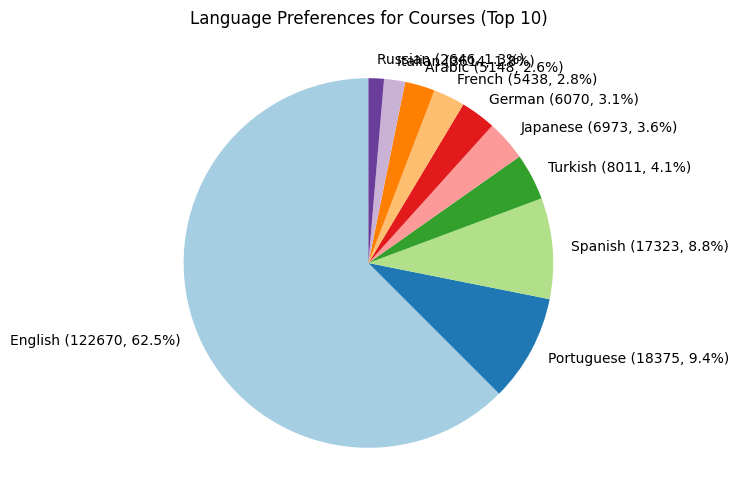

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Convert Spark DataFrame to Pandas DataFrame for plotting
language_preference_pd = language_preference.toPandas()

# Select the top 10 languages
top_10_languages_pd = language_preference_pd.head(10)

# Calculate the percentage of courses for each language
total_courses = top_10_languages_pd['count'].sum()
top_10_languages_pd['percentage'] = (top_10_languages_pd['count'] / total_courses) * 100

# Plotting a pie chart with percentage and number of courses
plt.figure(figsize=(8, 6))
labels = [f"{lang} ({count}, {percentage:.1f}%)"
          for lang, count, percentage in zip(top_10_languages_pd['language'], top_10_languages_pd['count'], top_10_languages_pd['percentage'])]
plt.pie(top_10_languages_pd['count'], labels=labels, autopct='', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Language Preferences for Courses (Top 10)')
plt.show()


ii) Top 5 language preferences for each "Category"

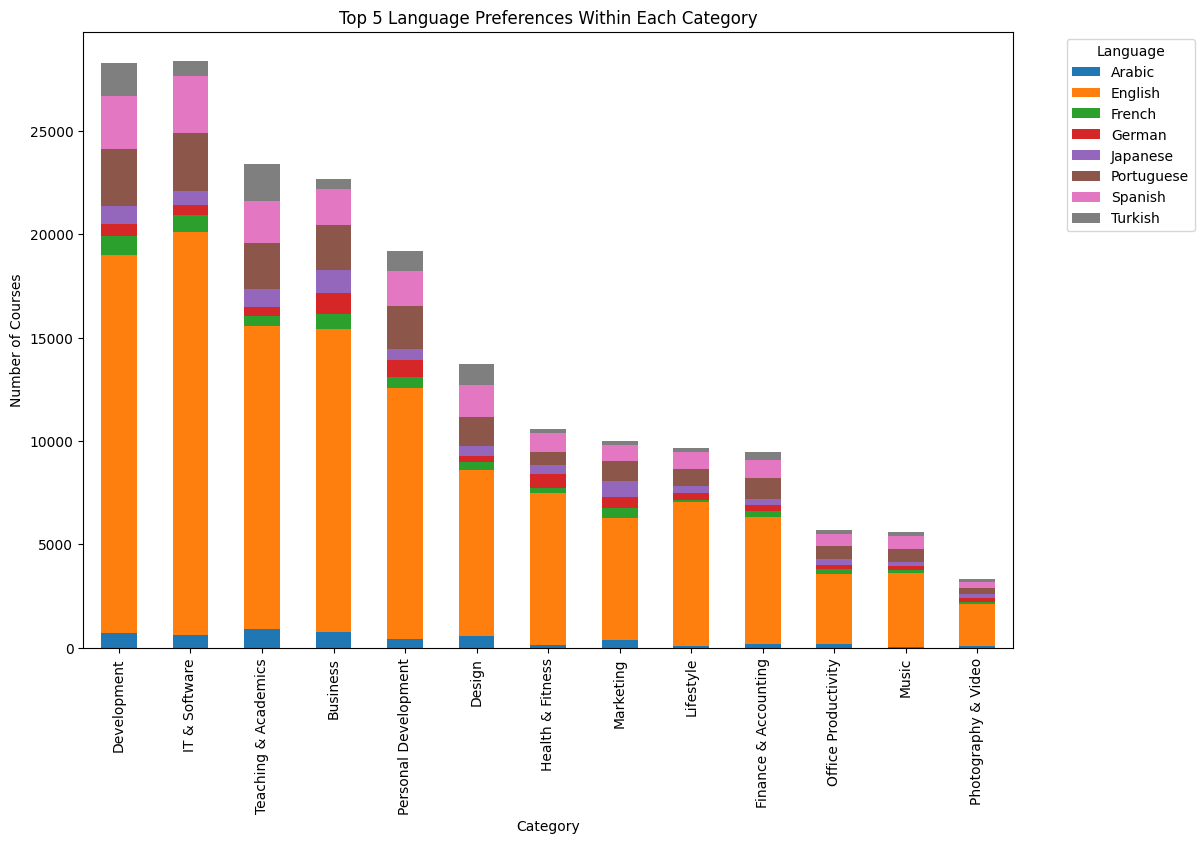

In [34]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count
import matplotlib.pyplot as plt

# Assuming you already have the course_info_df DataFrame

# Group by 'category' and 'language', then count the number of courses in each group
category_language_counts = course_info_df.groupBy(['category', 'language']).agg(count('*').alias('course_count'))

# Pivot the table to have 'category' as rows, 'language' as columns, and 'course_count' as values
category_language_pivot = category_language_counts.groupBy('category').pivot('language').sum('course_count').fillna(0)

# Convert the PySpark DataFrame to a Pandas DataFrame for sorting and plotting
category_language_pandas = category_language_pivot.toPandas()

# Set 'category' column as the index
category_language_pandas.set_index('category', inplace=True)

# Exclude non-numeric columns when calculating the total number of courses
#category_language_pandas['total_courses'] = category_language_pandas.drop('total_courses', axis=1).sum(axis=1)
category_language_pandas['total_courses'] = category_language_pandas.sum(axis=1)

# Sort the DataFrame by the total number of courses in descending order
category_language_pandas = category_language_pandas.sort_values(by='total_courses', ascending=False)

# Drop the 'total_courses' column for plotting
category_language_pandas.drop('total_courses', axis=1, inplace=True)

# Convert values to numeric to avoid type mismatch issues
category_language_pandas = category_language_pandas.apply(pd.to_numeric, errors='coerce')

# Select only the top 5 languages for each category based on total course count
top_5_languages_df = category_language_pandas.apply(lambda x: x.sort_values(ascending=False).head(5), axis=1)
category_language_pandas_top5 = category_language_pandas[top_5_languages_df.columns]

# Plot a stacked bar chart to visualize the top 5 language preferences within each category
ax = category_language_pandas_top5.plot(kind='bar', stacked=True, figsize=(12, 8))
ax.set_ylabel('Number of Courses')
ax.set_xlabel('Category')
ax.set_title('Top 5 Language Preferences Within Each Category')
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# 2. Course Popularity Analysis

i) Percentage of the Courses that have the highest number of subscribers:

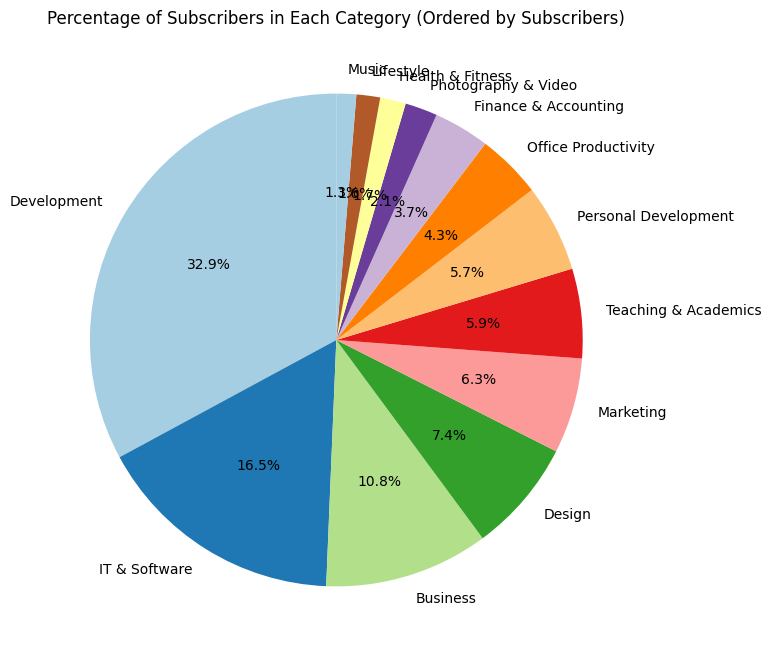

In [17]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum
import matplotlib.pyplot as plt

# Group by 'category' and sum the subscribers for each category
category_subscribers = course_info_df.groupBy('category').agg(sum('num_subscribers').alias('total_subscribers'))

# Sort by 'total_subscribers' in descending order
category_subscribers = category_subscribers.orderBy('total_subscribers', ascending=False)

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
pandas_category_subscribers = category_subscribers.toPandas()

# Plot the pie chart
plt.figure(figsize=(10,8))
plt.pie(pandas_category_subscribers['total_subscribers'], labels=pandas_category_subscribers['category'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage of Subscribers in Each Category (Ordered by Subscribers)')
plt.show()


ii) Distribution of Average Course Prices for Each Category

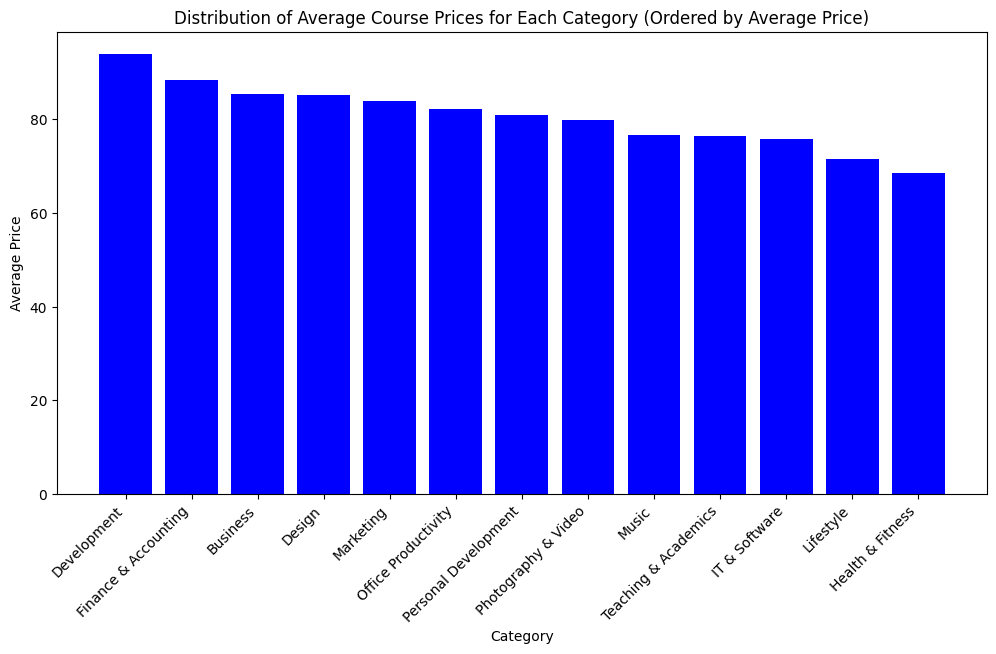

In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean
import matplotlib.pyplot as plt
import pandas as pd

# Group by 'category' and calculate the mean price for each category
category_price_stats = course_info_df.groupBy('category').agg(mean('price').alias('average_price'))

# Convert PySpark DataFrame to Pandas for plotting
pandas_category_price_stats = category_price_stats.toPandas()

# Order the DataFrame by 'average_price' in descending order
pandas_category_price_stats = pandas_category_price_stats.sort_values(by='average_price', ascending=False)

# Plot the distribution of course prices for each category
plt.figure(figsize=(12, 6))
plt.bar(pandas_category_price_stats['category'], pandas_category_price_stats['average_price'], color='blue')
plt.title('Distribution of Average Course Prices for Each Category (Ordered by Average Price)')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()


iii) Distribution of Average Course Prices for Each Subcategory in each Category

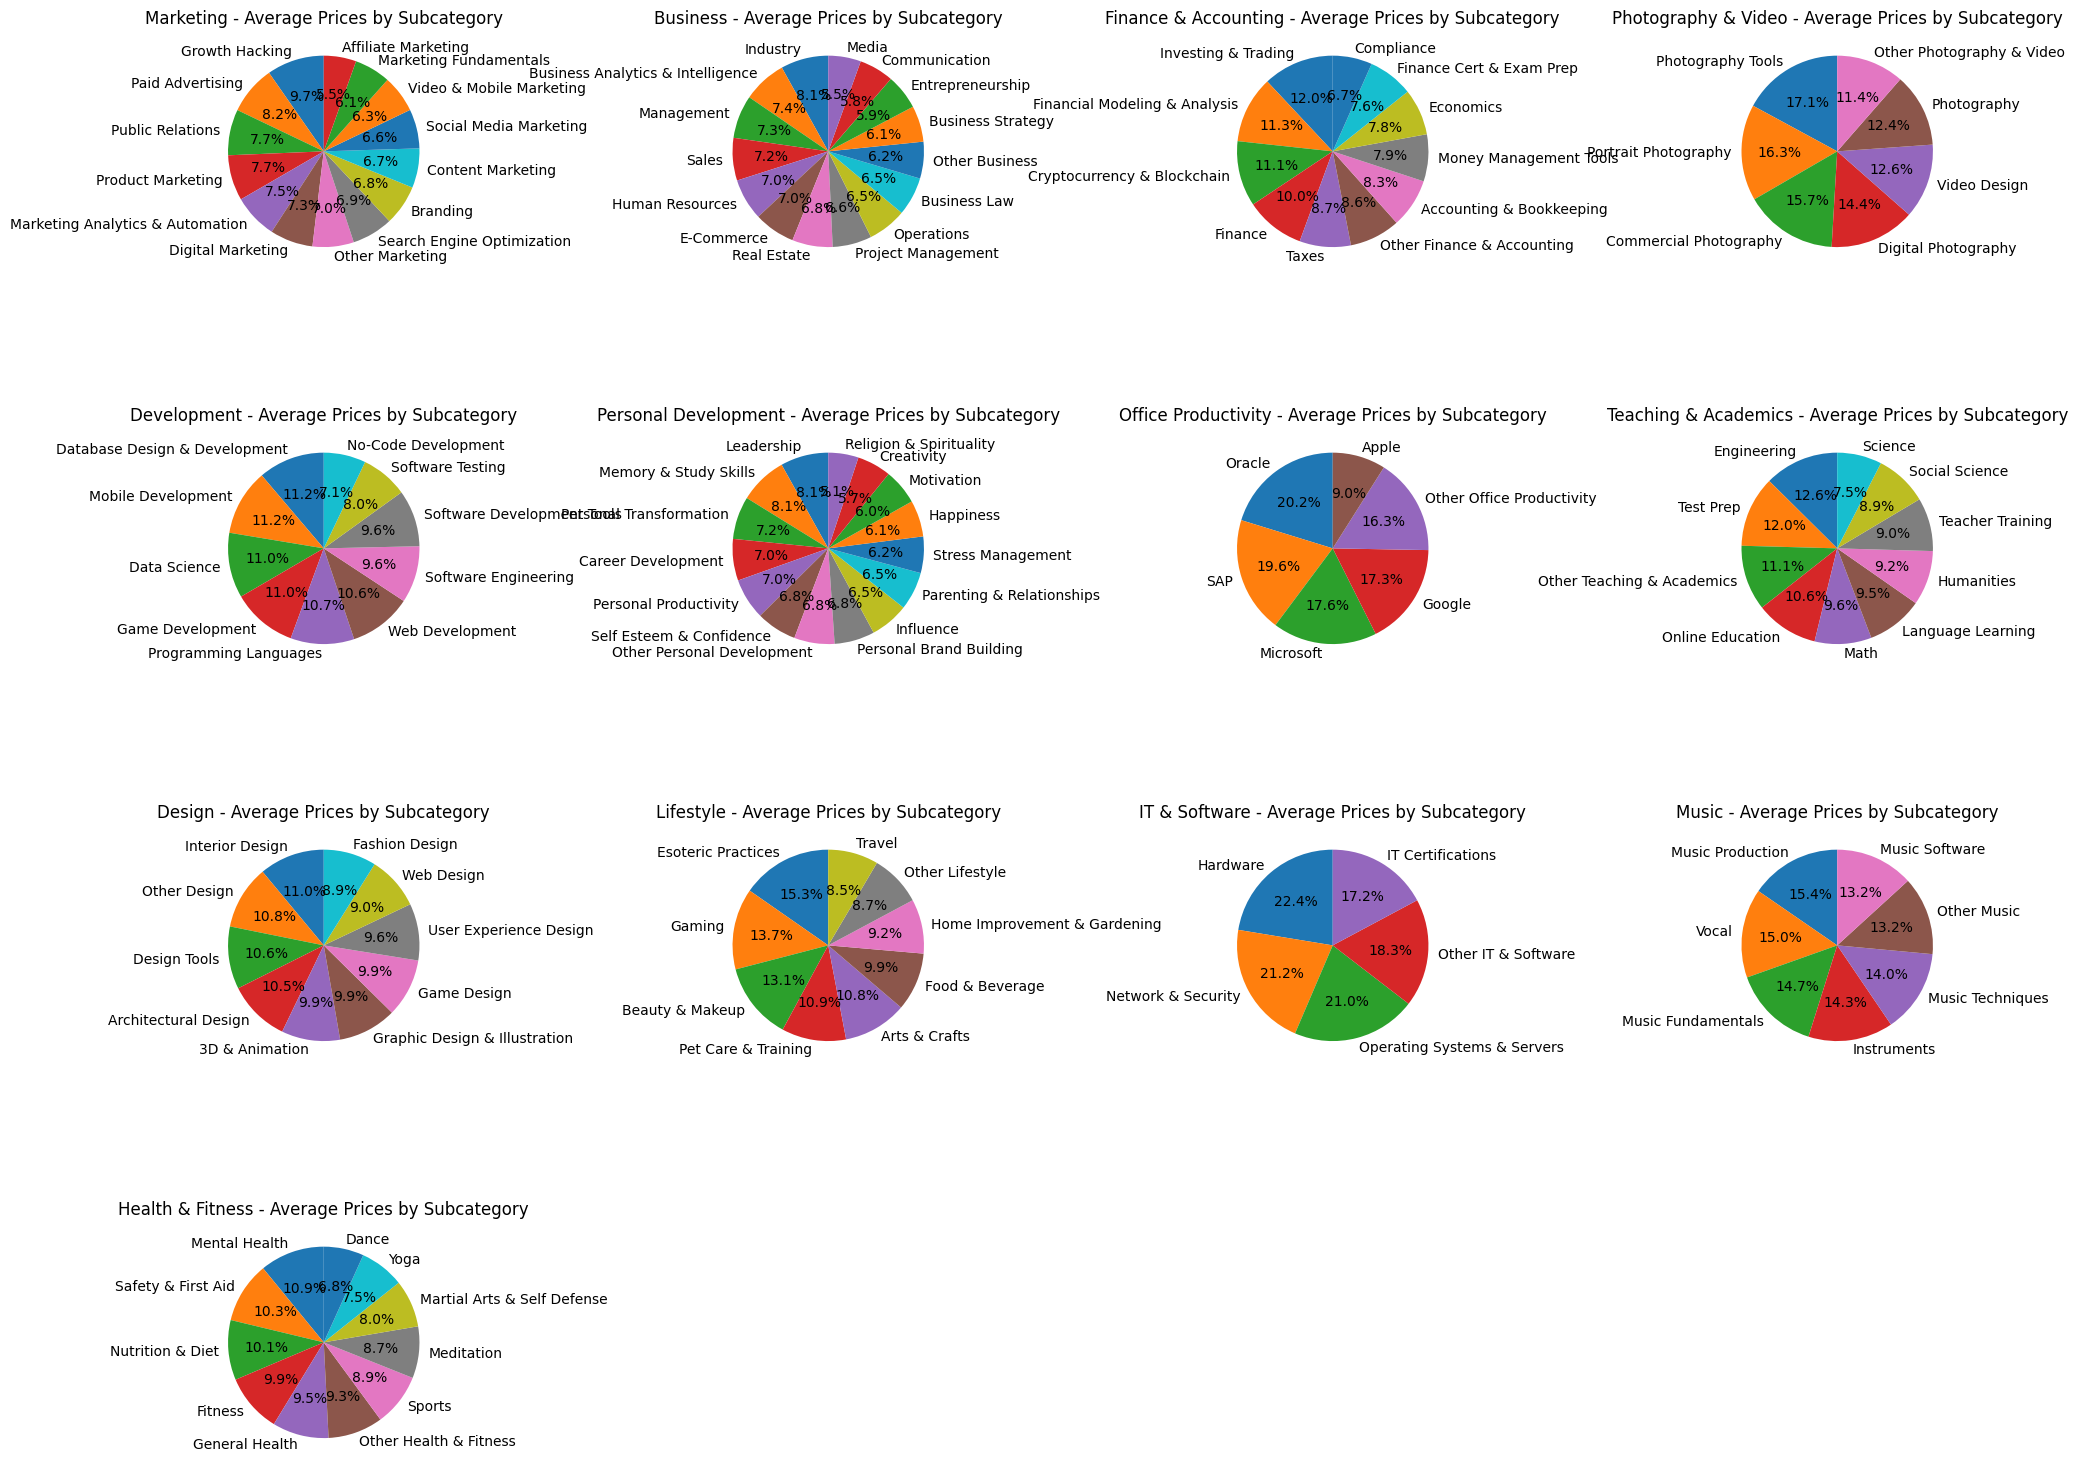

In [19]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import mean
import matplotlib.pyplot as plt
import pandas as pd

# Group by 'category', 'subcategory' and calculate the mean price for each subcategory within each category
subcategory_price_stats = course_info_df.groupBy('category', 'subcategory').agg(mean('price').alias('average_price'))

# Convert PySpark DataFrame to Pandas for plotting
pandas_subcategory_price_stats = subcategory_price_stats.toPandas()

# Order the DataFrame by 'average_price' in descending order
pandas_subcategory_price_stats = pandas_subcategory_price_stats.sort_values(by='average_price', ascending=False)

# Get unique categories
categories = pandas_subcategory_price_stats['category'].unique()

# Plot pie charts for each category
plt.figure(figsize=(20, 20))
for i, category in enumerate(categories, 1):
    plt.subplot(5, 4, i)
    subcategory_data = pandas_subcategory_price_stats[pandas_subcategory_price_stats['category'] == category]
    labels = subcategory_data['subcategory']
    sizes = subcategory_data['average_price']
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'{category} - Average Prices by Subcategory')

plt.tight_layout()
plt.show()


iv) Correlation between the number of subscribers and the course price:

Correlation between Number of Subscribers and Course Price: 0.018062443457210652


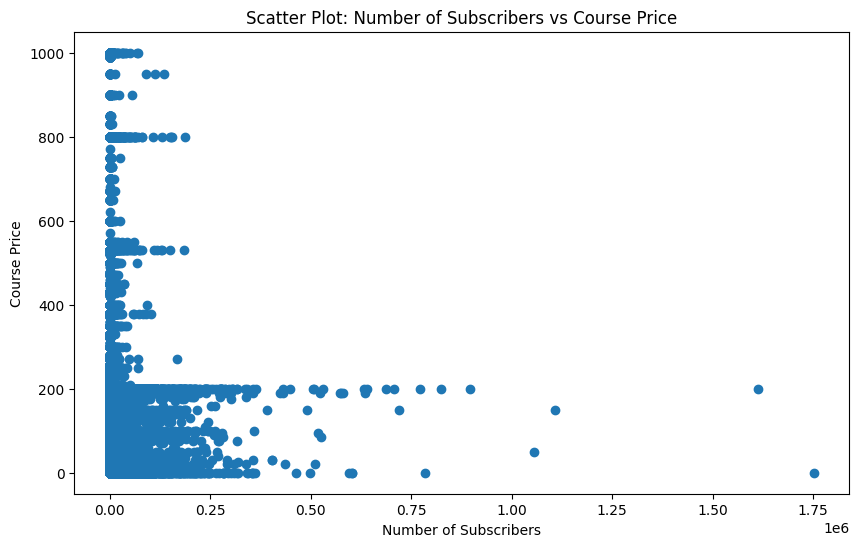

In [20]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import corr
import matplotlib.pyplot as plt

# Select relevant columns
correlation_data = course_info_df.select("num_subscribers", "price")

# Calculate the correlation between 'num_subscribers' and 'price'
correlation_value = correlation_data.stat.corr("num_subscribers", "price")

# Print the correlation value
print(f"Correlation between Number of Subscribers and Course Price: {correlation_value}")

# Plot the scatter plot
pandas_data = correlation_data.toPandas()
plt.figure(figsize=(10, 6))
plt.scatter(pandas_data['num_subscribers'], pandas_data['price'])
plt.title('Scatter Plot: Number of Subscribers vs Course Price')
plt.xlabel('Number of Subscribers')
plt.ylabel('Course Price')
plt.show()


Correlation between Number of Subscribers and number of reviews: 0.7353929601914677


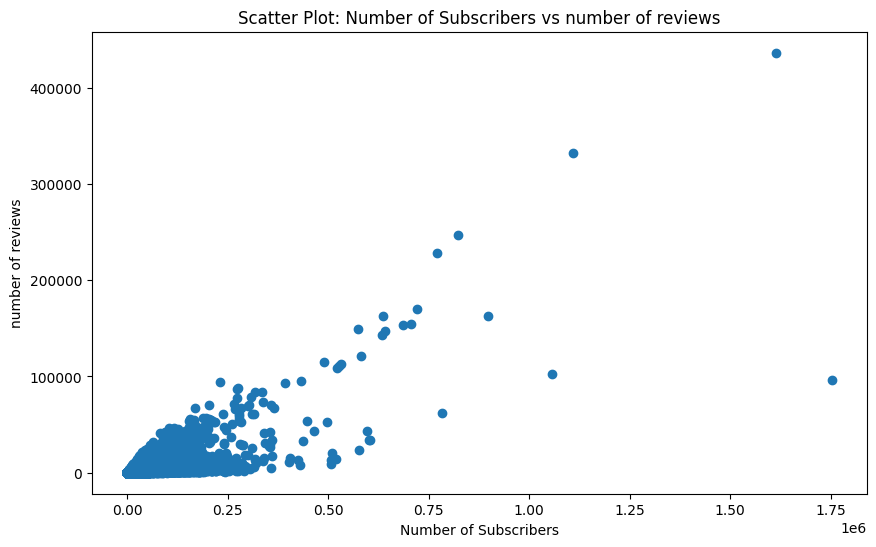

In [21]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import corr
import matplotlib.pyplot as plt

# Select relevant columns
correlation_data = course_info_df.select("num_subscribers", "num_reviews")

# Calculate the correlation between 'num_subscribers' and 'price'
correlation_value = correlation_data.stat.corr("num_subscribers", "num_reviews")

# Print the correlation value
print(f"Correlation between Number of Subscribers and number of reviews: {correlation_value}")

# Plot the scatter plot
pandas_data = correlation_data.toPandas()
plt.figure(figsize=(10, 6))
plt.scatter(pandas_data['num_subscribers'], pandas_data['num_reviews'])
plt.title('Scatter Plot: Number of Subscribers vs number of reviews')
plt.xlabel('Number of Subscribers')
plt.ylabel('number of reviews')
plt.show()


Correlation between Number of Subscribers and Number of lectures: 0.17881797864700497


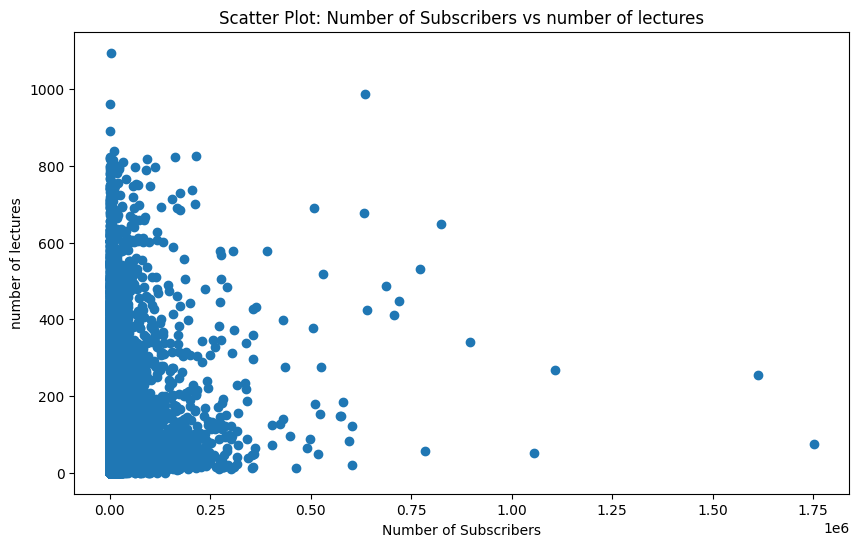

In [22]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import corr
import matplotlib.pyplot as plt

# Select relevant columns
correlation_data = course_info_df.select("num_subscribers", "num_lectures")

# Calculate the correlation between 'num_subscribers' and 'price'
correlation_value = correlation_data.stat.corr("num_subscribers", "num_lectures")

# Print the correlation value
print(f"Correlation between Number of Subscribers and Number of lectures: {correlation_value}")

# Plot the scatter plot
pandas_data = correlation_data.toPandas()
plt.figure(figsize=(10, 6))
plt.scatter(pandas_data['num_subscribers'], pandas_data['num_lectures'])
plt.title('Scatter Plot: Number of Subscribers vs number of lectures')
plt.xlabel('Number of Subscribers')
plt.ylabel('number of lectures')
plt.show()


### Comments.csv related code :

In [23]:
# Define schema for Udemy Course Comments 
comments = StructType([
StructField("id", StringType(), True),
StructField("course_id", StringType(), True),
StructField("rate", StringType(), True),
StructField("date", StringType(), True),
StructField("display_name", StringType(), True),
StructField("comment", StringType(), True)])
print(comments)

StructType([StructField('id', StringType(), True), StructField('course_id', StringType(), True), StructField('rate', StringType(), True), StructField('date', StringType(), True), StructField('display_name', StringType(), True), StructField('comment', StringType(), True)])


In [24]:
comments_df=spark.read.option("header","true").csv("Comments.csv",schema=comments)
comments_df.head(5)

[Row(id='88962892', course_id='3173036', rate='1.0', date='2021-06-29T18:54:25-07:00', display_name='Rahul', comment='I think a beginner needs more than you think.'),
 Row(id='Not satisfied.', course_id=None, rate=None, date=None, display_name=None, comment=None),
 Row(id='But whatever I learn thanks for that; I don\'t want my money back as you give your best."', course_id=None, rate=None, date=None, display_name=None, comment=None),
 Row(id='125535470', course_id='4913148', rate='5.0', date='2022-10-07T11:17:41-07:00', display_name='Marlo', comment='Aviva is such a natural teacher and healer/healing facilitator! This was really cool opportunity to witness a practical component of this work. What a wonderful intro about tuning into and working with electromagnetic fields :) Thank you for sharing!'),
 Row(id='68767147', course_id='3178386', rate='3.5', date='2020-10-19T06:35:37-07:00', display_name='Yamila Andrea', comment='Muy buena la introducción para entender la base de la legislaci

In [25]:
comments_df.count()

10813069

In [26]:
#Columns=["id","course_id","rate","date","display_name","comment"]
#comments_df.select([count(when(col(c).isNull(), c)).alias(c) for c in Columns]).show()

In [27]:
comments_df = comments_df.dropna(subset=["course_id"])

In [28]:
#course_info_df=course_info_df.dropna("id")
## Check if all the null values are removed from the dataframe
#course_info_df.select([count(when(col(c).isNull(), c)).alias(c) for c in Columns]).show()

## 3) Analysis on finding top 5 languages, in which users have given the highest scores for each category:

In [29]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, rank
from pyspark.sql.window import Window

# Join dataframes based on comments_df.course_id and course_info_df.id
joined_df = comments_df.join(course_info_df, comments_df.course_id == course_info_df.id, "inner")

# Group by 'language' and 'category', and calculate the average rating for each combination
average_rating_per_language_category = joined_df.groupBy('language', 'category').agg(avg('rate').alias('average_rating'))

# Use window function to rank languages within each category based on average rating
window_spec = Window.partitionBy('category').orderBy(col('average_rating').desc())

# Add a rank column to the DataFrame
ranked_df = (
    average_rating_per_language_category
    .withColumn('rank', rank().over(window_spec))
    .filter(col('rank') <= 6)  # Filter for the top 5 languages in each category
    .orderBy(col('category'), col('rank'))
)

# Select and order the columns according to the desired sequence
result_df = ranked_df.select('category', 'language', 'average_rating')

# Show the result
result_df.show(40)

+--------------------+---------+------------------+
|            category| language|    average_rating|
+--------------------+---------+------------------+
|            Business|  Burmese|               5.0|
|            Business|   Pashto|               5.0|
|            Business|  Kannada|               5.0|
|            Business| Croatian|               5.0|
|            Business|  Latvian|               5.0|
|            Business|Ukrainian|              4.88|
|              Design|    Uzbek|               5.0|
|              Design|Hungarian|               5.0|
|              Design|    Greek|               5.0|
|              Design|  Persian|               5.0|
|              Design|    Azeri|               5.0|
|              Design|  Swahili|               5.0|
|              Design|   Kazakh|               5.0|
|         Development| Albanian|               5.0|
|         Development| Gujarati|               5.0|
|         Development|Afrikaans|               5.0|
|         De

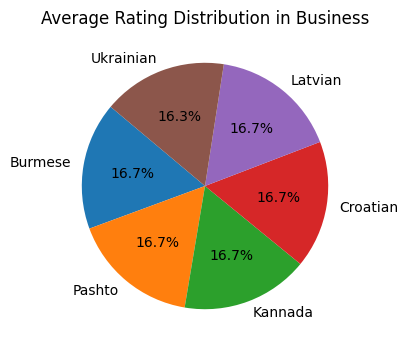

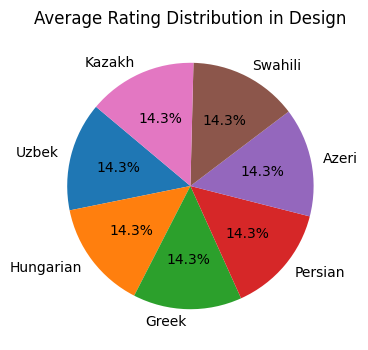

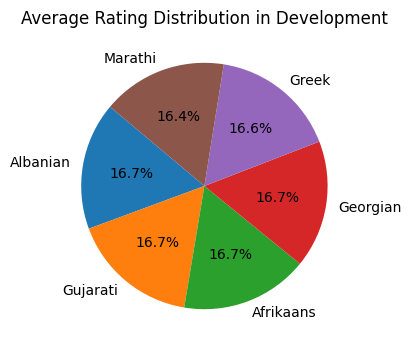

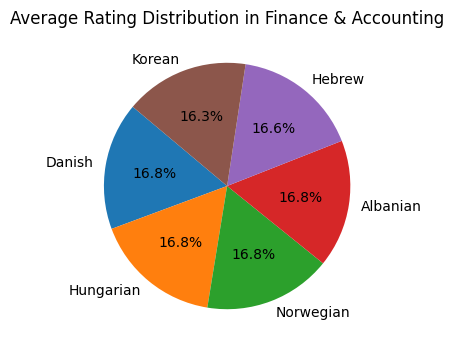

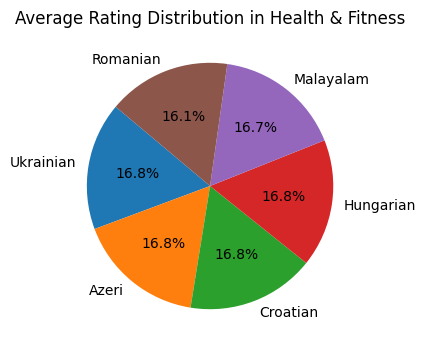

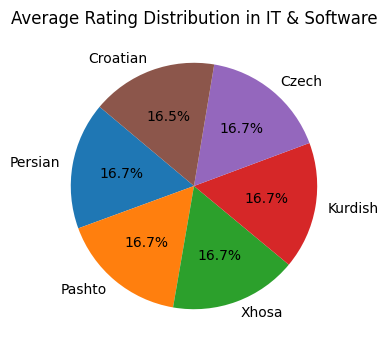

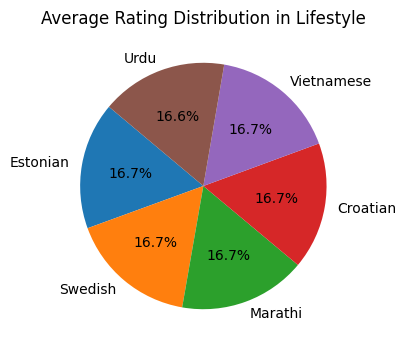

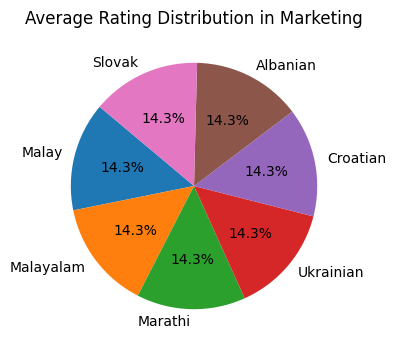

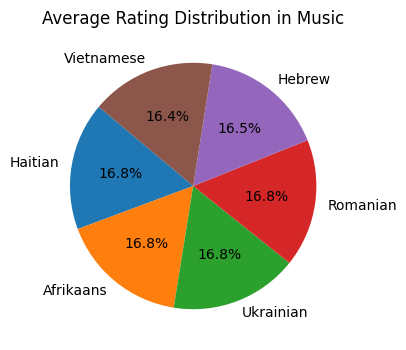

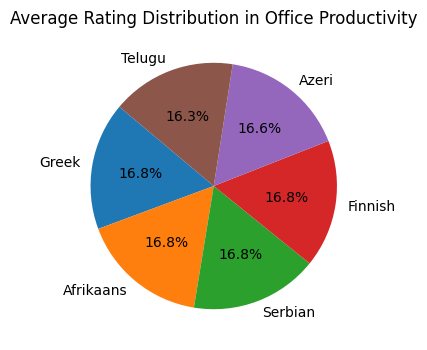

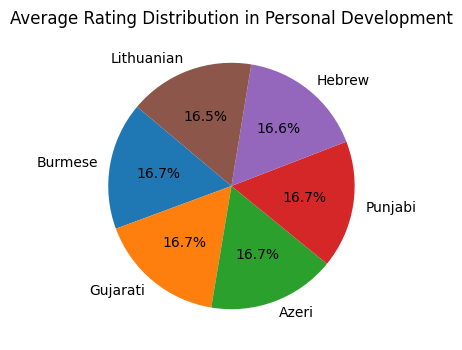

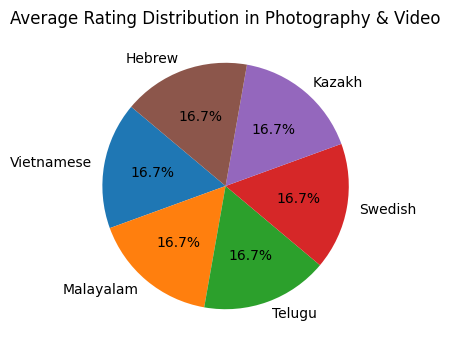

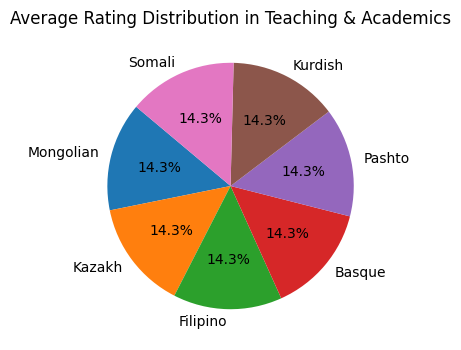

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already run the code to create the result_df DataFrame

# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
result_pandas_df = result_df.toPandas()

# Plot a pie chart for each category with the top 5 languages
categories = result_pandas_df['category'].unique()

for category in categories:
    category_data = result_pandas_df[result_pandas_df['category'] == category]
    
    plt.figure(figsize=(4, 4))
    plt.pie(category_data['average_rating'], labels=category_data['language'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Average Rating Distribution in {category}')
    plt.show()


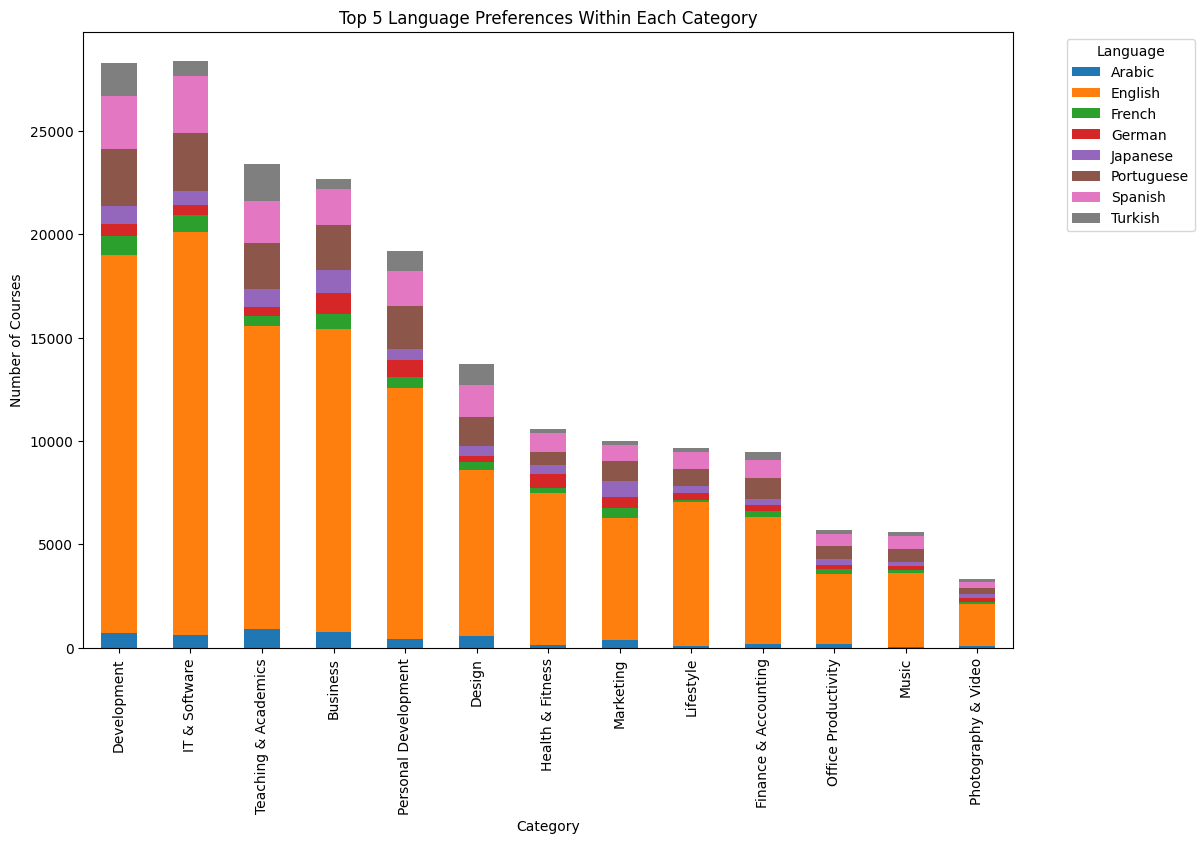